## Laboratorio DAC

In [ ]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import sounddevice as sd

## Listar sounddevice

In [ ]:
print(sd.query_devices())

## Grabar Audio

In [66]:
# Configuración para la grabación
fs = 44100  # Frecuencia de muestreo
duration = 3  # Duración en segundos
filename = 'output.wav'  # Nombre del archivo para guardar la grabación
print("Comenzando la grabación.")
recorded_data = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()  # Esperar hasta que la grabación termine
print("Grabación finalizada.")
# Guardar la grabación en un archivo WAV
write(filename, fs, recorded_data)

Comenzando la grabación.
Grabación finalizada.


## Grafica onda de audio

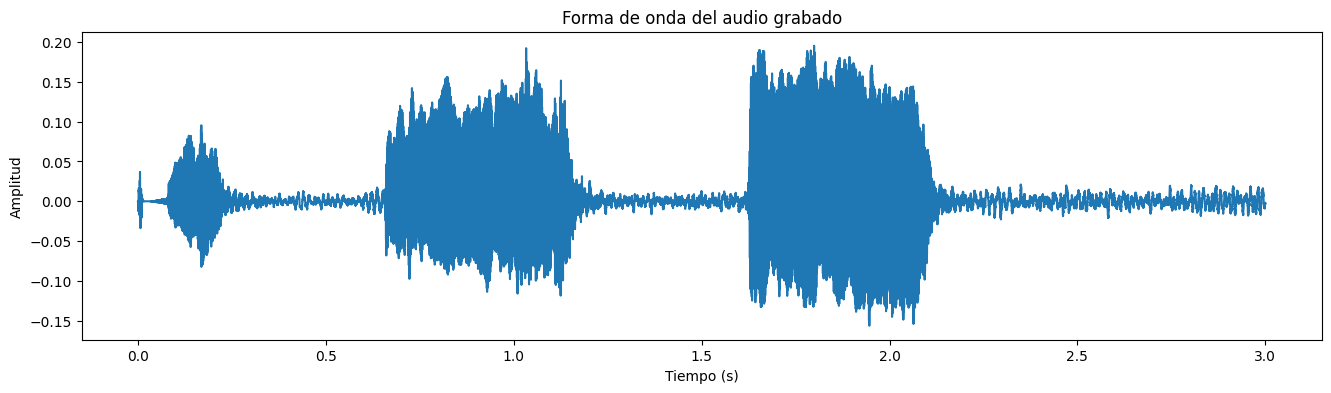

In [68]:
# Analizar la forma de onda
plt.figure(figsize=(16, 4))
plt.plot(np.linspace(0, duration, len(recorded_data)), recorded_data[:, 0])  # Graficar solo un canal
plt.title("Forma de onda del audio grabado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()



## Reproducir Audio grabado

In [69]:
# Reproducir el audio grabado
print("Reproduciendo el audio grabado.")
sd.play(recorded_data, fs)
sd.wait()  # Esperar hasta que la reproducción termine

Reproduciendo el audio grabado.


## Análisis en la frecuencia

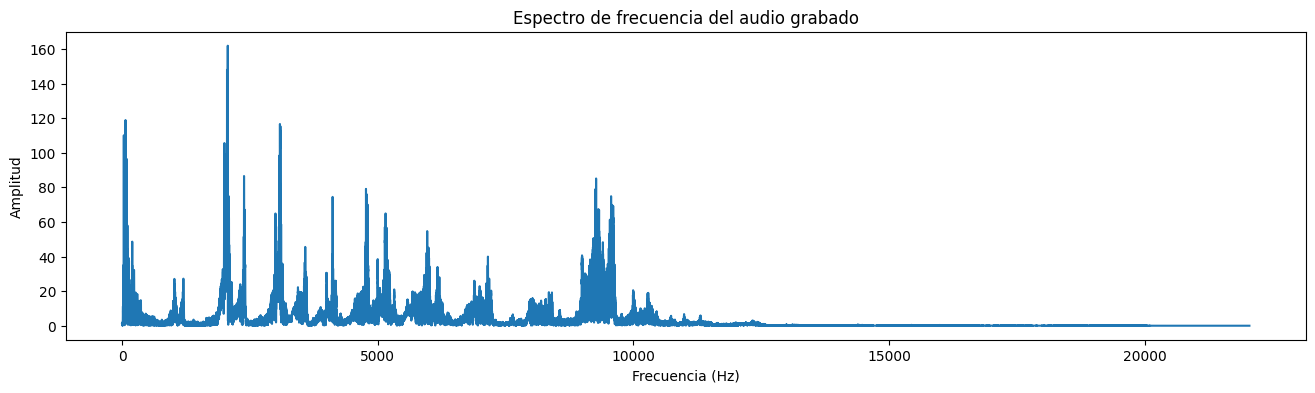

In [70]:
# Analisis en la frecuencia
n = len(recorded_data)
f = np.fft.fftfreq(n, 1/fs)
f = f[:n//2]
transformada = np.fft.fft(recorded_data[:, 0])
transformada = transformada[:n//2]
plt.figure(figsize=(16, 4))
plt.plot(f, np.abs(transformada))
plt.title("Espectro de frecuencia del audio grabado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

## Sample and Hold

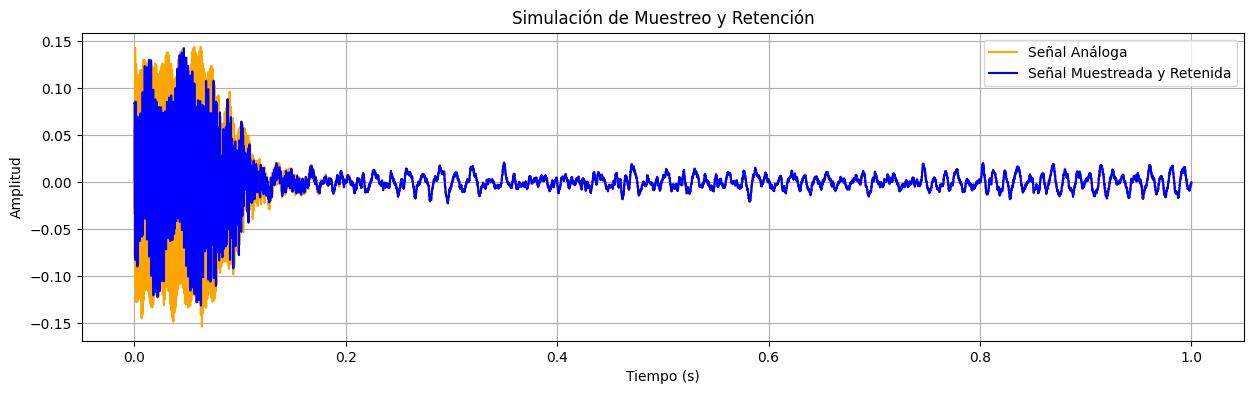

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que recorded_data es tu señal grabada y fs es la frecuencia de muestreo
fs = 44100  # Frecuencia de muestreo en Hz
duration = 1  # Duración de la señal que queremos analizar (último segundo)

# Tomar solo el último segundo de la señal
analog_signal = recorded_data[-fs:, 0]

# Simulación de muestreo y retención
sampling_period = 0.0002  # Segundos
sampling_rate = 1 / sampling_period  # Frecuencia de muestreo para la simulación
time = np.linspace(0, duration, fs * duration)  # Vector de tiempo para el último segundo

# Calcular los índices de muestreo basados en el período de muestreo
sampling_indices = np.arange(0, len(analog_signal), int(sampling_period * fs))
sampled_signal = np.zeros_like(analog_signal)

# Aplicar el muestreo y retención
for i in range(len(sampling_indices)-1):
    sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]

# Visualización de la señal original y la señal muestreada y retenida
plt.figure(figsize=(15, 4))
plt.plot(time, analog_signal, label='Señal Análoga', color='orange')
plt.step(time, sampled_signal, where='post', label='Señal Muestreada y Retenida', color='blue')
plt.title('Simulación de Muestreo y Retención')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import ipywidgets as widgets
from ipywidgets import interact

# Supongamos que recorded_data y fs están definidos previamente
fs = 44100  # Frecuencia de muestreo en Hz
analog_signal = recorded_data[-fs:, 0]  # Último segundo de la señal

def plot_signal_and_fft(sampling_period):
    # Simulación de muestreo y retención
    sampling_rate = 1 / sampling_period
    time = np.linspace(0, 1, fs, endpoint=False)
    sampling_indices = np.arange(0, len(analog_signal), int(sampling_period * fs))
    sampled_signal = np.zeros_like(analog_signal)
    for i in range(len(sampling_indices)-1):
        sampled_signal[sampling_indices[i]:sampling_indices[i+1]] = analog_signal[sampling_indices[i]]
    
    # Calculo de la FFT para ambas señales
    fft_analog = fft(analog_signal)
    fft_sampled = fft(sampled_signal)
    freq = fftfreq(len(analog_signal), 1/fs)
    
    # Gráfico en el dominio del tiempo
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, analog_signal, label='Señal Análoga', color='orange')
    plt.step(time, sampled_signal, where='post', label='Señal Muestreada y Retenida', color='blue')
    plt.title('Señales en el Dominio del Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    
    # Gráfico en el dominio de la frecuencia
    plt.subplot(2, 1, 2)
    plt.plot(freq, np.abs(fft_analog), label='FFT Señal Análoga', color='orange')
    plt.plot(freq, np.abs(fft_sampled), label='FFT Señal Muestreada y Retenida', color='blue', linestyle='--')
    plt.title('Análisis en el Dominio de la Frecuencia')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.xlim(0, fs / 2)  # Mostrar solo hasta la frecuencia de Nyquist
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crear un deslizador para ajustar el periodo de muestreo
sampling_period_slider = widgets.FloatSlider(value=0.1, min=0.0001, max=0.06, step=0.001, description='Periodo de Muestreo:')
interact(plot_signal_and_fft, sampling_period=sampling_period_slider)


interactive(children=(FloatSlider(value=0.06, description='Periodo de Muestreo:', max=0.06, min=0.0001, step=0…

<function __main__.plot_signal_and_fft(sampling_period)>

## Reproducir Audio

In [74]:
# Reproducir el audio grabado
print("Reproduciendo el último segundo de la señal grabada.")
sd.play(analog_signal, fs)
sd.wait()  # Esperar hasta que la reproducción termine

Reproduciendo el último segundo de la señal grabada.


In [76]:
# Reproducir el audio grabado
print("Reproduciendo el último segundo de la señal procesada.")
sd.play(sampled_signal, fs)
sd.wait()  # Esperar hasta que la reproducción termine

Reproduciendo el último segundo de la señal procesada.
